<a href="https://colab.research.google.com/github/YesquenJP/Data-Science/blob/main/Machine%20Learning/2_Pre_procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-procesamiento de datos - Caso : Mantenimiento predictivo de máquinas

<center>

| Variable | Descripción    |
|-------------------|-----------------------------------------------------------|
| UID                 | Identificador (índice) |
| type                | Tipo de calidad de producto : L(low), M(medium) y H (high) |
| productID           | Concatenado entre el 'type' y el número de serie del producto |
| air temperature     | Data simulada de temperatura del aire medida en K |
| process temperature | Data simulada de temperatura del proceso medida en K |
| rotational speed    | Calculado a partir de una potencia de 2860W más ruido aleatorio |
| torque              | Medida de toque en Newton metro (Nm) |
| tool wear           | Minutos de desgaste de la herramienta |
| machine failure     | Indicador si la máquina ha fallado (1) o no(0) |

</center>


## Lectura de datos

In [1]:
import pandas as pd
import numpy  as np
from sklearn import preprocessing
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
machine_maintenance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/ai4i2020.csv', index_col=[0])
machine_maintenance.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [4]:
machine_maintenance.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
machine_maintenance.shape # dimensión

(10000, 13)

In [6]:
# Data desbalanceada
machine_maintenance['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [7]:
# contando las clases en la variable Type
machine_maintenance.Type.value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

# **1. Codificación de variable categórica**

## Label Encoding:


In [8]:
label_encoder = preprocessing.LabelEncoder()

# transforma los valores de la columna Type a números enteros y los guarda en una nueva variable
machine_maintenance['Type_le']= label_encoder.fit_transform(machine_maintenance['Type'])

machine_maintenance.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_le
UDI,,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,2
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1


In [9]:
# valores únicos
machine_maintenance['Type_le'].unique()

array([2, 1, 0])

In [10]:
## Orden alfanumérico es
## H (0) -> L (1) -> M (2)

In [11]:
machine_maintenance.Type.value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [12]:
machine_maintenance.Type_le.value_counts()

1    6000
2    2997
0    1003
Name: Type_le, dtype: int64

## One Hot Encoding

In [13]:
machine_maintenance_ohe = pd.get_dummies(machine_maintenance, columns = ['Type'])
# La categoría original se transforma en variable dummy
# print(machine_maintenance_ohe)

In [14]:
machine_maintenance_ohe.head()

,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_le,Type_H,Type_L,Type_M
UDI,,,,,,,,,,,,,,,,
1,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,2,0,0,1
2,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1,0,1,0
3,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1,0,1,0
4,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1,0,1,0
5,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1,0,1,0


In [15]:
machine_maintenance_ohe[['Type_le','Type_H','Type_L','Type_M']].head()

,Type_le,Type_H,Type_L,Type_M
UDI,,,,
1,2,0,0,1
2,1,0,1,0
3,1,0,1,0
4,1,0,1,0
5,1,0,1,0


# 2. **Escalamiento**


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [18]:
fig = px.box(machine_maintenance_ohe, y = 'Rotational speed [rpm]', title= "Box plot of Rotational speed [rpm]",)
fig.show()

In [19]:
# import plotly.express as px
fig = px.histogram(machine_maintenance_ohe, x='Rotational speed [rpm]',
                   title="Box plot of Rotational speed [rpm]")
fig.show()

In [35]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

machine_maintenance_ohe_num = machine_maintenance_ohe.select_dtypes(include=numerics) # eligiendo el tipo de variables

In [36]:
machine_maintenance_ohe.dtypes

Product ID                  object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
Type_le                      int64
Type_H                       uint8
Type_L                       uint8
Type_M                       uint8
dtype: object

In [37]:
machine_maintenance_ohe_num.dtypes

Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
Type_le                      int64
dtype: object

## Estandarización

In [38]:
## Esto estandariza todo el dataset de variables númericas
nrmlzd = StandardScaler()

variables_objetivo = ['Torque [Nm]','Rotational speed [rpm]']
## Asi solo estandarizamos las columnas especificadas en una lista
ct = ColumnTransformer([
        ('estandarizacion', nrmlzd, variables_objetivo)
    ], remainder='passthrough')

In [39]:
data_std = ct.fit_transform(machine_maintenance_ohe_num)

In [40]:
print(data_std.shape)
data_std

(10000, 12)


array([[ 2.82199756e-01,  6.81851403e-02,  2.98100000e+02, ...,
         0.00000000e+00,  0.00000000e+00,  2.00000000e+00],
       [ 6.33308020e-01, -7.29471505e-01,  2.98200000e+02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 9.44289625e-01, -2.27449840e-01,  2.98100000e+02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [-6.60776724e-01,  5.92518879e-01,  2.99000000e+02, ...,
         0.00000000e+00,  0.00000000e+00,  2.00000000e+00],
       [ 8.54004643e-01, -7.29471505e-01,  2.99000000e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.13764743e-02, -2.16293803e-01,  2.99000000e+02, ...,
         0.00000000e+00,  0.00000000e+00,  2.00000000e+00]])

In [41]:
machine_maintenance_ohe_num.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_le'],
      dtype='object')

In [28]:
# Este paso es importante
# Porque al escoger las columnas a escalar (transformar), al generar el nuevo dataset
# estas cambian de posición, pasando a los primeros lugares según el orden en que
# están en la lista, y el resto viene a continuación

columnas = variables_objetivo + [x for x in machine_maintenance_ohe_num.columns if x not in variables_objetivo]
# variables que elegi para estandarizar, las demás variables

In [42]:
columnas

['Torque [Nm]',
 'Rotational speed [rpm]',
 'Air temperature [K]',
 'Process temperature [K]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF',
 'Type_le']

In [44]:
data_std= pd.DataFrame(data_std,
                       index   = machine_maintenance_ohe_num.index,
                       columns = columnas)
# lo volvemos df por que era un array
# le añadimos nombre de columnas, por eso cambiamos el orden en la parte anterior
data_std

,Torque [Nm],Rotational speed [rpm],Air temperature [K],Process temperature [K],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_le
UDI,,,,,,,,,,,,
1,0.282200,0.068185,298.1,308.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.633308,-0.729472,298.2,308.7,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.944290,-0.227450,298.1,308.5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.048845,-0.590021,298.2,308.6,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.001313,-0.729472,298.2,308.7,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-1.052012,0.363820,298.8,308.4,14.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
9997,-0.821283,0.520005,298.9,308.4,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,-0.660777,0.592519,299.0,308.6,22.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [45]:
machine_maintenance_ohe_num.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_le
UDI,,,,,,,,,,,,
1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,2
2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1
3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1
4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1
5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1


In [46]:
data_std.head()

,Torque [Nm],Rotational speed [rpm],Air temperature [K],Process temperature [K],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_le
UDI,,,,,,,,,,,,
1,0.282200,0.068185,298.1,308.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.633308,-0.729472,298.2,308.7,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.944290,-0.227450,298.1,308.5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.048845,-0.590021,298.2,308.6,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.001313,-0.729472,298.2,308.7,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
fig = px.box(data_std, y= 'Rotational speed [rpm]',
             title= "Box plot of Rotational speed [rpm] StandardScaler")
fig.show()

In [48]:
# import plotly.express as px
fig = px.histogram(data_std, x='Rotational speed [rpm]',
                   title="Box plot of Rotational speed [rpm] StandardScaler")
fig.show()

In [51]:
data_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Torque [Nm],10000.0,5.424994e-16,1.000050,-3.630149,-0.680840,0.011345,0.683466,3.672902
Rotational speed [rpm],10000.0,-2.330580e-16,1.000050,-2.068196,-0.645801,-0.199560,0.408444,7.514840
Air temperature [K],10000.0,3.000049e+02,2.000259,295.300000,298.300000,300.100000,301.500000,304.500000
Process temperature [K],10000.0,3.100056e+02,1.483734,305.700000,308.800000,310.100000,311.100000,313.800000
Tool wear [min],10000.0,1.079510e+02,63.654147,0.000000,53.000000,108.000000,162.000000,253.000000
Machine failure,10000.0,3.390000e-02,0.180981,0.000000,0.000000,0.000000,0.000000,1.000000
TWF,10000.0,4.600000e-03,0.067671,0.000000,0.000000,0.000000,0.000000,1.000000
HDF,10000.0,1.150000e-02,0.106625,0.000000,0.000000,0.000000,0.000000,1.000000
PWF,10000.0,9.500000e-03,0.097009,0.000000,0.000000,0.000000,0.000000,1.000000
OSF,10000.0,9.800000e-03,0.098514,0.000000,0.000000,0.000000,0.000000,1.000000


## Normalización

In [54]:
## Esto estandariza todo el dataset de variables numericas
nrmlzd2 = MinMaxScaler()

variables_objetivo = ['Torque [Nm]','Rotational speed [rpm]']
## Asi solo estandarizamos las columnas especificadas en una lista
ct2 = ColumnTransformer([
        ('estandarizacion', nrmlzd2, variables_objetivo)
    ], remainder='passthrough')

In [55]:
# Este paso es importante
# Porque al escoger las columnas a escalar (transformar), al generar el nuevo dataset
# estas cambian de posición, pasando a los primeros lugares según el orden en que
# están en la lista, y el resto viene a continuación

columnas = variables_objetivo + [x for x in machine_maintenance_ohe_num.columns if x not in variables_objetivo]

In [56]:
data_minmax = ct2.fit_transform(machine_maintenance_ohe_num)

In [57]:
data_minmax= pd.DataFrame(data_minmax,
                       index   = machine_maintenance_ohe_num.index,
                       columns = columnas)
# data_std

In [58]:
machine_maintenance_ohe_num.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_le
UDI,,,,,,,,,,,,
1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,2
2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1
3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1
4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1
5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1


In [59]:
data_minmax.head()

,Torque [Nm],Rotational speed [rpm],Air temperature [K],Process temperature [K],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_le
UDI,,,,,,,,,,,,
1,0.535714,0.222934,298.1,308.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.583791,0.139697,298.2,308.7,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.626374,0.192084,298.1,308.5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.490385,0.154249,298.2,308.6,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.497253,0.139697,298.2,308.7,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
fig = px.box(data_minmax, y= 'Rotational speed [rpm]',
             title= "Box plot of Rotational speed [rpm] MinMaxScaler")
fig.show()

In [61]:
# import plotly.express as px
fig = px.histogram(data_minmax, x='Rotational speed [rpm]',
                   title="Box plot of Rotational speed [rpm] MinMaxScaler")
fig.show()

## Binning

In [66]:
## Q número de quantiles
# binning: proceso de agrupar un conjunto de valores continuos en intervalos discretos o "bins"
data_minmax['new_bin'] = pd.qcut(data_minmax['Rotational speed [rpm]'], q=10)
data_minmax.head(2)

,Torque [Nm],Rotational speed [rpm],Air temperature [K],Process temperature [K],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_le,new_bin
UDI,,,,,,,,,,,,,
1,0.535714,0.222934,298.1,308.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,"(0.217, 0.242]"
2,0.583791,0.139697,298.2,308.7,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"(0.138, 0.158]"


In [63]:
data_minmax.new_bin.value_counts().sort_index()

(-0.001, 0.114]    1016
(0.114, 0.138]      991
(0.138, 0.158]     1015
(0.158, 0.176]      996
(0.176, 0.195]      990
(0.195, 0.217]     1009
(0.217, 0.242]      986
(0.242, 0.277]     1006
(0.277, 0.336]      994
(0.336, 1.0]        997
Name: new_bin, dtype: int64

## Transformación logarítmica

In [67]:
## El valor de 0.001 se agrega para evitar los errores por si hay 0s
machine_maintenance['Rotational speed [rpm] Log'] = np.log(machine_maintenance['Rotational speed [rpm]'] + 0.001)

In [68]:
# import plotly.express as px
fig = px.histogram(machine_maintenance, x='Rotational speed [rpm] Log',
                   title="Box plot of Rotational speed [rpm] Log")
fig.show()

# Coeficiente de correlación - esto no es parte del pre-procesamiento

In [69]:
# machine_maintenance.corr(method='pearson')
machine_maintenance.corr(method='spearman') # metodo no parametrico

<ipython-input-69-9d78c4fe7d76>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_le,Rotational speed [rpm] Log
Air temperature [K],1.000000,0.864217,0.013732,-0.011765,0.013495,0.083223,0.009161,0.138089,0.004867,0.002479,0.019255,0.016340,0.013732
Process temperature [K],0.864217,1.000000,0.016985,-0.014488,0.013702,0.039946,0.006843,0.063588,-0.002810,0.004394,0.023277,0.013051,0.016985
Rotational speed [rpm],0.013732,0.016985,1.000000,-0.916474,0.003168,-0.167188,0.005671,-0.161262,-0.035879,-0.134172,-0.011596,-0.004055,1.000000
Torque [Nm],-0.011765,-0.014488,-0.916474,1.000000,-0.003887,0.169413,-0.015495,0.138580,0.057584,0.153947,0.013923,0.002484,-0.916474
Tool wear [min],0.013495,0.013702,0.003168,-0.003887,1.000000,0.101630,0.110621,-0.001599,-0.009423,0.151631,0.011406,-0.004027,0.003168
Machine failure,0.083223,0.039946,-0.167188,0.169413,0.101630,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516,-0.008396,-0.167188
TWF,0.009161,0.006843,0.005671,-0.015495,0.110621,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970,-0.004353,0.005671
HDF,0.138089,0.063588,-0.161262,0.138580,-0.001599,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706,-0.001201,-0.161262
PWF,0.004867,-0.002810,-0.035879,0.057584,-0.009423,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273,0.011184,-0.035879
OSF,0.002479,0.004394,-0.134172,0.153947,0.151631,0.531083,0.038243,0.046396,0.115836,1.000000,-0.004341,-0.025973,-0.134172


In [70]:
variables_cor = ['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'Type_le']

In [ ]:
# machine_maintenance_ohe_num.columns.tolist()

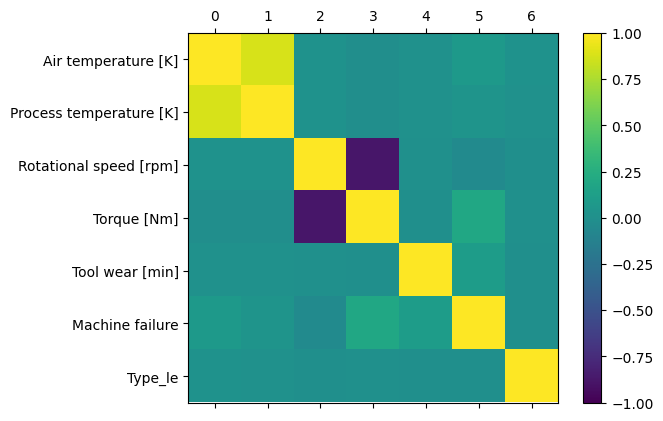

In [71]:
# plotea la matriz de correlacion
import matplotlib.pyplot as plt

names = variables_cor

correlations = machine_maintenance_ohe_num[variables_cor].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(variables_cor),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
# ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [72]:
import plotly.express as px
fig = px.scatter(machine_maintenance_ohe_num, x='Air temperature [K]', y='Process temperature [K]')
fig.show()

In [73]:
import plotly.express as px
fig = px.scatter(machine_maintenance_ohe_num, x='Rotational speed [rpm]', y='Torque [Nm]')
fig.show()